#Logistic Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve


In [2]:
import pandas as pd

#Load the dataset

In [ ]:
data1=pd.read_csv('/content/Titanic_train.csv')
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data2=pd.read_csv('/content/Titanic_test.csv')
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
merged_data = pd.merge(data1, data2,  how='outer')
print(merged_data)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [ ]:
merged_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
#Examine the features ,their types,and summary  statistics
merged_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


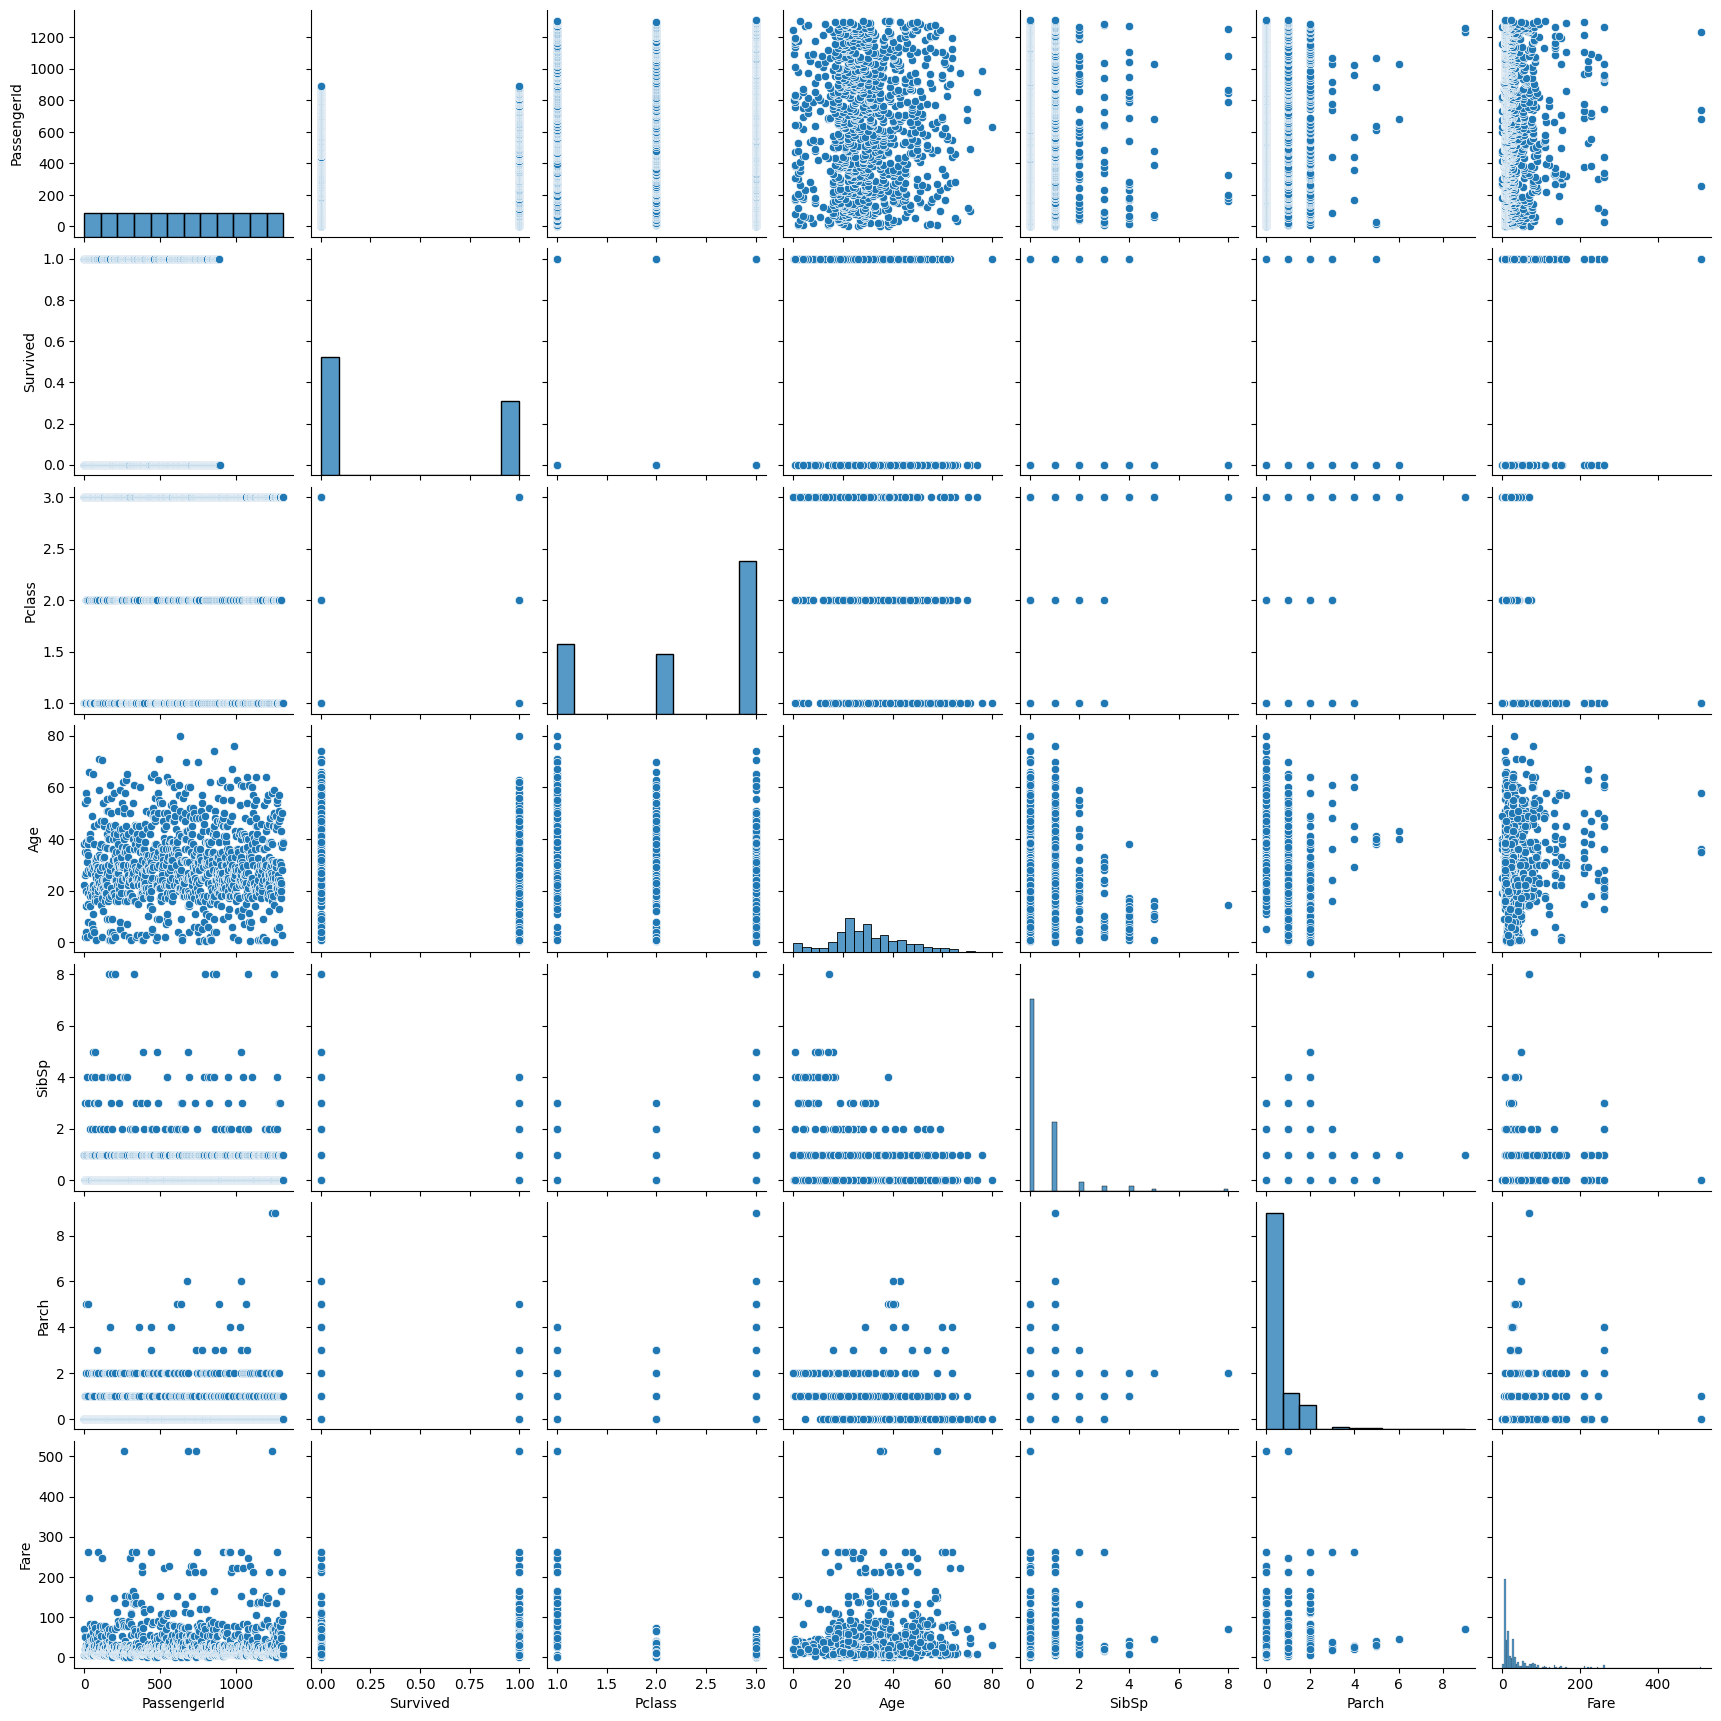

In [ ]:
#pairplot
sns.pairplot(merged_data)
plt.show()

#Data Preprocessing

In [ ]:
# Handle Missing Values
merged_data.fillna(method='ffill', inplace=True)

<ipython-input-11-9a014a37b84d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


In [ ]:
# Encode Categorical Variables (if involved)
merged_data = pd.get_dummies(merged_data, drop_first=True)
merged_data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1.0,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,28.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1305,1306,0.0,1,39.0,0,0,108.9000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,1307,0.0,3,38.5,0,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1307,1308,0.0,3,38.5,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Train-Test Split
X = merged_data.drop('Survived', axis=1)
y = merged_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model Building

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

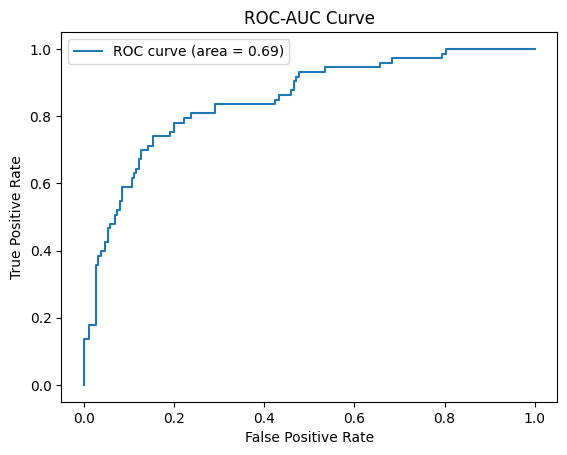

In [ ]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

Accuracy: 0.81
ROC-AUC Score: 0.69


#Interpretation


In [ ]:
coefficients = model.coef_[0]
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])
feature_importance['Significance'] = feature_importance['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

print(feature_importance)

          Feature  Coefficient  Odds Ratio Significance
0     PassengerId    -0.002437    0.997566     Negative
1          Pclass    -0.534991    0.585674     Negative
2             Age    -0.011606    0.988461     Negative
3           SibSp     0.130647    1.139566     Positive
4           Parch    -0.925426    0.396363     Negative
...           ...          ...         ...          ...
2423     Cabin_F4     0.027442    1.027822     Positive
2424     Cabin_G6    -0.114251    0.892034     Negative
2425      Cabin_T    -0.041327    0.959515     Negative
2426   Embarked_Q     0.051671    1.053029     Positive
2427   Embarked_S     0.484446    1.623275     Positive

[2428 rows x 4 columns]


In [ ]:
print("\nInterpretation of Features:")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}")
    print(f"  Coefficient: {row['Coefficient']}")
    print(f"  Odds Ratio: {row['Odds Ratio']}")
    print(f"  Significance: {row['Significance']}")
    print()

Streaming output truncated to the last 5000 lines.
Feature: Ticket_17765
  Coefficient: 0.0
  Odds Ratio: 1.0
  Significance: Negative

Feature: Ticket_17770
  Coefficient: -0.030227676494241656
  Odds Ratio: 0.9702246110619603
  Significance: Negative

Feature: Ticket_19877
  Coefficient: -0.027681152433248278
  Odds Ratio: 0.972698459899527
  Significance: Negative

Feature: Ticket_19924
  Coefficient: 0.0
  Odds Ratio: 1.0
  Significance: Negative

Feature: Ticket_19928
  Coefficient: -0.012925402043930433
  Odds Ratio: 0.9871577722257872
  Significance: Negative

Feature: Ticket_19943
  Coefficient: 0.16264238455776214
  Odds Ratio: 1.1766158384480903
  Significance: Positive

Feature: Ticket_19947
  Coefficient: 0.09088572289136207
  Odds Ratio: 1.0951438482347913
  Significance: Positive

Feature: Ticket_19950
  Coefficient: -0.27569902038263167
  Odds Ratio: 0.7590413523601944
  Significance: Negative

Feature: Ticket_19952
  Coefficient: 0.12276434200404346
  Odds Ratio: 1.1306

In [ ]:
#deployment with streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


#Interview Questions

**1. What is the difference between precision and recall?**
#Precision:
#Definition:
Measures the accuracy of positive predictions.
#Interpretation:
High precision means that when the model predicts a positive instance, it is usually correct. It minimizes false positives.

#Recall:
#Definition:
Measures the model’s ability to identify all relevant positive instances.
#Interpretation:
High recall means the model successfully identifies most of the actual positive instances. It minimizes false negatives.

#Differences:

1.Precision focuses on the quality of positive predictions, while recall focuses on the quantity of actual positives identified.

2.There is often a trade-off between precision and recall.












**2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique used to evaluate the performance and generalizability of a machine learning model by splitting the dataset into multiple subsets, training the model on some subsets, and validating it on the remaining subsets.

#Importance in Binary Classification:

#Reduces Overfitting:
Ensures the model performs well on different subsets of the data.
#Provides Reliable Performance Estimate:
Averages results from multiple folds for a more reliable estimate.
Helps in Model Selection and #Hyperparameter Tuning:
Useful for comparing models and tuning hyperparameters.
#Handles Imbalanced Data:
Techniques like stratified K-Fold ensure representative distribution of class labels.
